<h1>US Medical Insurance Costs - Portfolio Project</h1>

<h1>Goals</h1>

<h3>Provide insight into patterns of insurance costs for patients according to lifestyles</h3>
<p>What will change in your insurance if you decide to have a child ?! What about if you start smoking ?! Can you afford to make these decisions ?! Let's find out !</p>

In [1]:
from math import sqrt
import os
import matplotlib.pyplot as plt

In [2]:
class datasetAnalyser():
    def __init__(self, file_path: str):
        self.file_path = file_path
        self.file_name = file_path.rsplit('\\')[-1]
        self.data = self.readData()
        self.header = self.getHeader()
        self.columns = self.getColumns()
        self.cardinality = len(self.data)
        
    def readData(self) -> list:
        # read data from dataset into list of strings excluding header
        with open(self.file_path, mode='r') as fp:
            _ = fp.readline()
            data = fp.readlines()
        return data
    
    def getHeader(self) -> str:
        # get header from dataset
        with open(self.file_path, mode='r') as fp:
            header = fp.readline()
        return header
    
    def getColumns(self) -> list:
        # separate data values from columns into lists
        column_count = len(self.header.strip().split(','))
        columns = [[] for i in range(column_count)]
        for row in self.data:
            for column in range(column_count):
                columns[column].append(row.split(',')[column])
        return columns
    
    def readAsDict(self) -> dict:
        # read data as a dictionary
        dictVar = {self.file_name: []}
        keys = self.header.strip().split(',')
        for n in range(self.cardinality):
            row = self.data[n].strip().split(',')
            dictVar[self.file_name].append({})
            for k in range(len(keys)):
                dictVar[self.file_name][n].update({keys[k]:row[k]})
        return dictVar
                
    def createNewDict(self, name: str, *columns: tuple) -> dict:
        # create a new dictionary with select columns
        # usage : object.createNewDict('name_here', 'column1', 'column2', 'column3', [...])
        newDict = {name:[]}
        if columns == ():
            print('Columns not found.')
            print("Usage : object.createNewDict('name_here', 'column1', 'column2', 'column3', [...])")
            return None
        for n in range(self.cardinality):
            row = self.data[n].strip().split(',')
            newDict[name].append({})
            for k in range(len(columns)):
                newDict[name][n].update({columns[k]:row[k]})
        return newDict
    
    def saveAsCsv(self, name: str):
        # save object data as a new CSV file
        # usage: object.saveAsCsv('new_file_name_here')
        if not name.endswith('.csv'):
            name = name + '.csv'
        files = os.listdir()
        if name in files:
            raise FileExistsError()
        with open(name, mode='w') as fp:
            fp.write(self.header)
        with open(name, mode='a') as fp:
            for row in self.data:
                fp.write(row)
    
    def grabMean(self, column_name: str, type_of_value: str) -> dict:
        # returns mean value of all values of column
        # usage: object.grabMean('column_name_here', 'type_of_value_here') Types of value: int, float, str, [...]
        columns_list = self.header.strip().split(',')
        try:
            index = columns_list.index(column_name)
        except exception as exc:
            print('Exception Encountered')
            print('Description: ' + str(exc))
            print('Type: ' + str(type(exc)))
            return None
        if type_of_value in ['int', 'float', 'integer', 'numerical', 'numeral', 'digit', 'number']:
            values = [float(value) for value in self.columns[index]]
            sum_of_values = sum(values)
            return round(sum_of_values / self.cardinality, 2)
        elif type_of_value in ['str', 'string', 'text', 'char']:
            value_count = {}
            unique_values = set(self.columns[index])
            for value in unique_values:
                value_count.update({value : str(round(self.columns[index].count(value) * 100 / self.cardinality, 2))+'%'})
            return value_count
        else:
            print('Type of value not found')
            print("Usage: object.grabMean('column_name_here', 'type_of_value_here')\nExamples of types of value: int, float, str, [...]")
    
    def grabCount(self, column_name: str) -> dict:
        # returns count for each value in column
        # usage: object.grabCount('column_name_here')
        columns_list = self.header.strip().split(',')
        try:
            index = columns_list.index(column_name)
        except exception as exc:
            print('Exception Encountered')
            print('Description: ' + str(exc))
            print('Type: ' + str(type(exc)))
            return None
        value_count = {}
        unique_values = set(self.columns[index])
        for value in unique_values:
            value_count.update({value : self.columns[index].count(value)})
        return value_count
    
    def measuresOfDispersion(self, column_name: str) -> dict:
        # calculate Standard Deviation(SD), Variance, Coefficient of Variation(CV), Mean and Median
        labels = ['Standard Deviation', 'Variance', 'Coefficient of Variation', 'Mean', 'Median']
        columns_list = self.header.strip().split(',')
        index = columns_list.index(column_name)
        result = {}
        sizeOf = self.cardinality
        
        try:
            column = [float(value) for value in self.columns[index]]
        except Exception as exc:
            print('Make sure the column contains numerical values.')
            print('Description: ' + str(exc))
            print('Type: ' + str(type(exc)))
            return
        
        "MEAN"
        mean = sum(column)/sizeOf
        
        "VARIANCE"
        variance = 0
        for i in column:
            variance += ((i-mean)**2) / (sizeOf-1)

        "STANDARD DEVIATION"
        sd = sqrt(variance)

        "COEFFICIENT OF VARIATION"
        cv = sd / mean

        "MEDIAN"
        median = 0
        sorted_values = sorted(column)
        if sizeOf % 2 == 0:
            "if it's even, get the average of the middle values"
            mid = sizeOf // 2
            median = (sorted_values[mid-1]+sorted_values[mid])/2
        elif sizeOf % 2 == 1:
            mid = sizeOf / 2
            median = sorted_values[int(mid)]

        values = [sd, variance, cv, mean, median]

        for n in range(5):
            result.update({labels[n] : round(values[n],4)})
        return result

In [3]:
data = datasetAnalyser('insurance.csv')

<h3>Column's Index</h3>

In [4]:
col_names = data.header.strip().split(',')
col_indexes = {i: col_names[i] for i in range(7)}
for key, value in col_indexes.items():
    print(f'Index {key} : Column {value}')

Index 0 : Column age
Index 1 : Column sex
Index 2 : Column bmi
Index 3 : Column children
Index 4 : Column smoker
Index 5 : Column region
Index 6 : Column charges


<h1>Analysing Data</h1>

<h3>Charges Distribution</h3>

In [5]:
charges_calculations = data.measuresOfDispersion('charges')

for key, value in charges_calculations.items():
    print(f"\t{key}: {value}")

	Standard Deviation: 12110.0112
	Variance: 146652372.1529
	Coefficient of Variation: 0.9126
	Mean: 13270.4223
	Median: 9382.033


<h3>Age Distribution</h3>

In [6]:
age_calculations = data.measuresOfDispersion('age')

for key, value in age_calculations.items():
    print(f"\t{key}: {value}")
print()

	Standard Deviation: 14.05
	Variance: 197.4014
	Coefficient of Variation: 0.3584
	Mean: 39.207
	Median: 39.0



<h3>BMI Distribution</h3>

In [7]:
bmi_calculations = data.measuresOfDispersion('bmi')

for key, value in bmi_calculations.items():
    print(f"\t{key}: {value}")
print()

	Standard Deviation: 6.0982
	Variance: 37.1879
	Coefficient of Variation: 0.1989
	Mean: 30.6634
	Median: 30.4



<h3>Smokers Distribution</h3>

In [8]:
smokers_info = data.grabMean('smoker', 'str')

print(f"\tThe percentage of smokers in the dataset is {smokers_info.get('yes')}")
print(f"\tMeanwhile, the percentage of nonsmokers in the dataset is {smokers_info.get('no')}")

	The percentage of smokers in the dataset is 20.48%
	Meanwhile, the percentage of nonsmokers in the dataset is 79.52%


<h3>Sex Distribution</h3>

In [9]:
smokers_info = data.grabMean('sex', 'str')

for key, value in smokers_info.items():
    print(f"\tThe percentage of {key}s in the dataset is {value}")

	The percentage of females in the dataset is 49.48%
	The percentage of males in the dataset is 50.52%


<h1>Age statistics of patients with at least one child</h1>

In [10]:
Age_Column = data.columns[0] # -> int
Children_Column = data.columns[3] # -> int

Age_vs_Children = zip(Age_Column, Children_Column)
Parents_Age_Sum = 0
Parents_Counter = 0
Nonparents_Age_Sum = 0
Nonparents_Counter = 0

for pair in Age_vs_Children:
    if int(pair[1]) > 0:
        Parents_Age_Sum += int(pair[0])
        Parents_Counter += 1
    else:
        Nonparents_Age_Sum += int(pair[0])
        Nonparents_Counter += 1

In [11]:
print(f'The average age of patients with at least one child is {Parents_Age_Sum/Parents_Counter:.0f} years old.')
print(f'Meanwhile, the average age of patients with no children is {Nonparents_Age_Sum/Nonparents_Counter:.0f} years old.')

The average age of patients with at least one child is 40 years old.
Meanwhile, the average age of patients with no children is 38 years old.


<h1>Average insurance charges grouped by smoking status</h1>

In [12]:
Charge_Column = data.columns[6] # -> float
Smoker_Column = data.columns[4] # -> string

Charge_vs_Smoker = zip(Charge_Column, Smoker_Column)
Charge_Smoker_Sum = 0
Charge_Smoker_Counter = 0
Charge_Nonsmoker_Sum = 0
Charge_Nonsmoker_Counter = 0

for pair in Charge_vs_Smoker:
    if pair[1] == 'yes':
        Charge_Smoker_Sum += float(pair[0])
        Charge_Smoker_Counter += 1
    else:
        Charge_Nonsmoker_Sum += float(pair[0])
        Charge_Nonsmoker_Counter += 1

In [13]:
print(f'The average charge for patients who smoke is ${Charge_Smoker_Sum/Charge_Smoker_Counter:.2f}.')
print(f'Meanwhile, the average charge for nonsmokers is ${Charge_Nonsmoker_Sum/Charge_Nonsmoker_Counter:.2f}.')

The average charge for patients who smoke is $32050.23.
Meanwhile, the average charge for nonsmokers is $8434.27.


<h3>Notations:</h3>
<p>Smokers pay on average 280% more than non-smokers for insurance.</p>

<h1>Relationship between BMI and prices of insurance</h1>

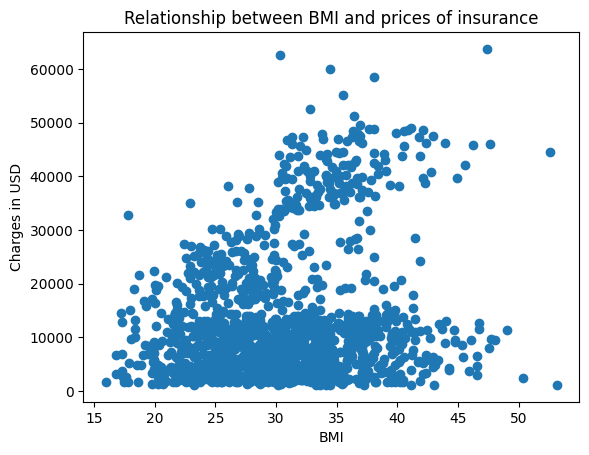

In [14]:
BMI_Column = data.columns[2] # -> float
# Charge Column # -> float

BMI_vs_Charge = list(zip(BMI_Column, Charge_Column))

BMI_vs_Charge = [(float(bmi), float(charge)) for bmi, charge in BMI_vs_Charge]

Relationship_BMI_vs_Charge = zip(*BMI_vs_Charge)

plt.scatter(*Relationship_BMI_vs_Charge)
plt.title('Relationship between BMI and prices of insurance')
plt.xlabel('BMI')
plt.ylabel('Charges in USD')

plt.show()

<h3>Notations:</h3>
<p>A high BMI seems to be quite impactful on the price of your insurance.</p>

<h1>Average insurance price organized by how many children the patient has</h1>

In [15]:
# Children_Column # -> int
# Charge_Column # -> float

Children_vs_Charge = zip(Children_Column, Charge_Column)
count = data.grabCount('children')
count = {int(key): value for key,value in count.items()}

values = {}
for pair in Children_vs_Charge:
    if int(pair[0]) in values.keys():
        values[int(pair[0])] += float(pair[1])
    else:
        values[int(pair[0])] = float(pair[1])

result = {key:0 for key in values.keys()}

for i in range(len(values.keys())):
    result[i] = round(values.get(i)/count.get(i), 2)

In [16]:
for children in sorted(result.keys()):
    print(f'The average charge for patients with {children} is ${result.get(children):.2f}.')

The average charge for patients with 0 is $12365.98.
The average charge for patients with 1 is $12731.17.
The average charge for patients with 2 is $15073.56.
The average charge for patients with 3 is $15355.32.
The average charge for patients with 4 is $13850.66.
The average charge for patients with 5 is $8786.04.


<h3>Notations:</h3>
<p>Having children of your own doesn't seem to have a very high impact in your insurance price.</p>